<a href="https://colab.research.google.com/github/AKASH4671/Sentiment-Analysis-on-Financial-News-and-Its-Impact-on-Stock-Prices/blob/main/02_text_preporcessing_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**mount drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**download & import libraries**

In [ ]:
# Download required NLTK resources and import necessities

!pip install langdetect
!pip install googletrans==4.0.0-rc1
!pip install nltk
!pip install wordcloud seaborn
!pip install spacy

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect
from googletrans import Translator

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


**load dataset**

In [ ]:
# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Finance Projects/Sentiment-Analysis-on-Financial-News-and-Its-Impact-on-Stock-Prices/data/apple_newsapi_news.csv"
df = pd.read_csv(file_path)
df

,date,headline,summary,url,source,content
0,2025-06-24 23:59:58+00:00,Node v22.17.0 (LTS),"Node.js® is a free, open-source, cross-platfor...",https://nodejs.org/en/blog/release/v22.17.0,Nodejs.org,Antoine du Hamel\r\nConstructing classes like ...
1,2025-06-24 23:57:16+00:00,"Marcelo vê Moçambique a ""olhar para o futuro""",Presidente da República está em Moçambique par...,https://observador.pt/2025/06/25/marcelo-ve-mo...,Observador.pt,O Presidente da República Portuguesa disse est...
2,2025-06-24 23:56:34+00:00,Obediências maçónicas emitem declaração em def...,"Cabecinha, Rola e Valente alertam para esvazia...",https://observador.pt/2025/06/25/tres-obedienc...,Observador.pt,Os dirigentes das três principais obediências ...
3,2025-06-24 23:54:57+00:00,8点1氪｜顺丰等多家快递公司拒收罗马仕充电宝；字节通报大模型团队负责人出轨HRBP处理结果；...,上市进行时\n 斯坦德机器人（无锡）股份有限公司\n 36氪获悉，近日，斯坦德机器人（无锡）...,https://36kr.com/p/3351137481288323,36kr.com,36App201662210.52\r\n36623\r\n36HH\r\nTOP3\r\n...
4,2025-06-24 23:54:56+00:00,Almada. Detido suspeito de tentativa de homicí...,"Cidadão luso-brasileiro de 48 anos efetuou, em...",https://observador.pt/2025/06/25/detido-em-alm...,Observador.pt,"A Polícia Judiciária (PJ) deteve em Almada, no..."
...,...,...,...,...,...,...
2943,2025-07-22 16:24:00+00:00,Caviar trasforma l'iPhone 17 Pro Max in un pez...,"Solo 7 esemplari numerati, titanio inciso e un...",https://tech.everyeye.it/notizie/caviar-trasfo...,Everyeye.it,"Quando si parla di edizioni speciali, Caviar h..."
2944,2025-07-22 16:23:46+00:00,Vor Quartalszahlen: Banker bescheinigen Apple ...,Vor der Veröffentlichung der Quartalszahlen En...,https://www.apfelpage.de/news/vor-quartalszahl...,Apfelpage.de,Vor der Veröffentlichung der Quartalszahlen En...
2945,2025-07-22 16:22:11+00:00,"Serie A, nuova partnership: su Bazr in vendita...",Nuovo accordo di sponsorizzazione per la Serie...,https://www.tuttomercatoweb.com/serie-a/serie-...,Tuttomercatoweb.com,Nuovo accordo di sponsorizzazione per la Serie...
2946,2025-07-22 16:22:00+00:00,Huawei Pura 80 slated for imminent launch with...,Even Huawei seems to concede that its next new...,https://www.notebookcheck.net/Huawei-Pura-80-s...,Notebookcheck.net,Huawei introduced successors to the Pura 70 Ul...


**drop NaNs row wise**

In [ ]:
df.isna().sum()

,0
date,0
headline,3
summary,171
url,0
source,0
content,2


In [ ]:
# Drop rows with no content
df.dropna(subset=["headline", "summary", "content"], how="all", inplace=True)

# Fill NaNs in parts to avoid concat issues
df["headline"] = df["headline"].fillna("")
df["summary"] = df["summary"].fillna("")
df["content"] = df["content"].fillna("")

# Combine title + description + content into a unified text
df["text"] = df["headline"] + ". " + df["summary"] + ". " + df["content"]

**1. detect languages**

 **2. preprocess text data**

In [ ]:
# Initialize tools
translator = Translator()
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Translate if not English
def translate_to_english(text, lang):
    try:
        if lang != 'en':
            translated = translator.translate(text, dest='en')
            return translated.text
        return text
    except:
        return text

# Clean text
def clean_text(text):
    try:
        text = str(text).lower()
        text = re.sub(r"http\S+", "", text)  # remove URLs
        text = re.sub(r"[^a-z\s]", "", text)  # remove special characters
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
        return " ".join(tokens)
    except:
        return ""

# Apply language detection
df['lang_detected'] = df['text'].apply(detect_language)

# Translate non-English to English
df['translated_text'] = df.apply(lambda row: translate_to_english(row['text'], row['lang_detected']), axis=1)

# Clean the translated text
df["cleaned_text"] = df["translated_text"].apply(clean_text)

In [ ]:
# Check unique languages detected
print("Unique languages detected:")
print(df['lang_detected'].value_counts())

# Preview translations
print("\n Sample translations:")
display(df[['lang_detected', 'text', 'translated_text']].head(5))

# Preview cleaned text
print("\n Cleaned text samples:")
display(df[['translated_text', 'cleaned_text']].head(5))

# Check if any translation failed (translated text same as original non-English)
non_english = df[df['lang_detected'] != 'en']
failed_translations = non_english[non_english['translated_text'] == non_english['text']]

print(f"\n Failed translations: {len(failed_translations)}")
if len(failed_translations) > 0:
    display(failed_translations[['lang_detected', 'text']].head(5))


Unique languages detected:
lang_detected
en       1850
pt        322
es        310
ja        131
ru         86
it         46
cs         39
fr         36
de         31
vi         22
zh-cn      10
ko         10
pl         10
tr          9
nl          8
no          8
el          5
ro          3
et          3
sv          3
zh-tw       3
id          2
th          1
Name: count, dtype: int64

 Sample translations:


,lang_detected,text,translated_text
0,en,"Node v22.17.0 (LTS). Node.js® is a free, open-...","Node v22.17.0 (LTS). Node.js® is a free, open-..."
1,pt,"Marcelo vê Moçambique a ""olhar para o futuro""....","Marcelo sees Mozambique to ""look at the future..."
2,pt,Obediências maçónicas emitem declaração em def...,Masonic Obediences issue a statement in defens...
3,zh-cn,8点1氪｜顺丰等多家快递公司拒收罗马仕充电宝；字节通报大模型团队负责人出轨HRBP处理结果；...,8:1Kr | SF Express and other express delivery ...
4,pt,Almada. Detido suspeito de tentativa de homicí...,Almada.Detained suspected of attempted murder ...



 Cleaned text samples:


,translated_text,cleaned_text
0,"Node v22.17.0 (LTS). Node.js® is a free, open-...",node lts nodejs free opensource crossplatform ...
1,"Marcelo sees Mozambique to ""look at the future...",marcelo see mozambique look futurepresident re...
2,Masonic Obediences issue a statement in defens...,masonic obedience issue statement defense peac...
3,8:1Kr | SF Express and other express delivery ...,express express delivery company refused accep...
4,Almada.Detained suspected of attempted murder ...,almadadetained suspected attempted murder braz...



 Failed translations: 0


**EDA & plots**

1. Word Cloud

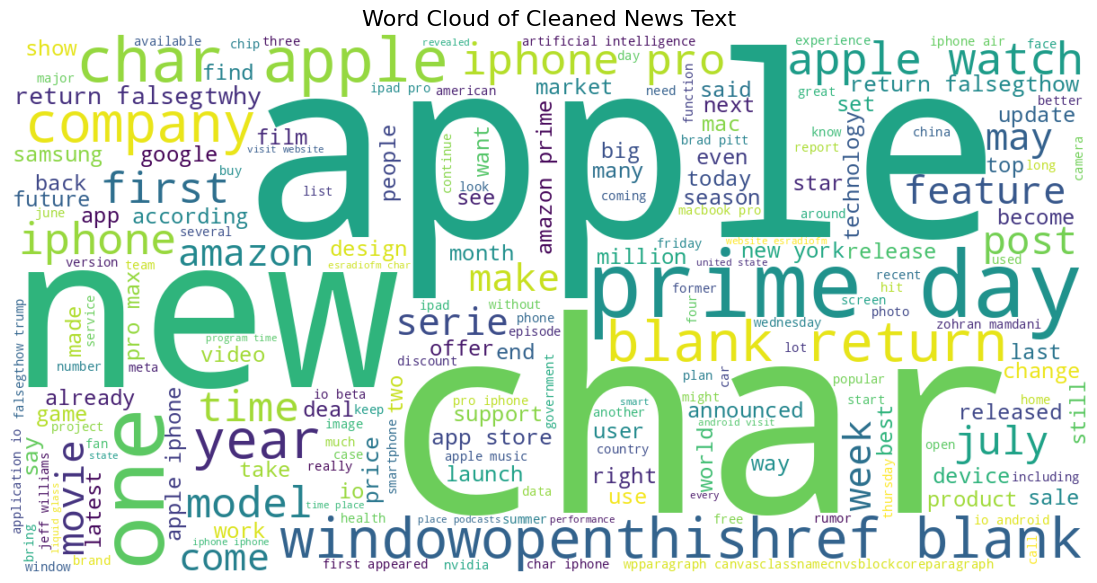

In [ ]:
# Join all cleaned text
all_words = " ".join(df['cleaned_text'].dropna())

# Generate WordCloud
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(all_words)

# Plot
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned News Text", fontsize=16)
plt.show()

2. Article Length Distribution (Word Count)

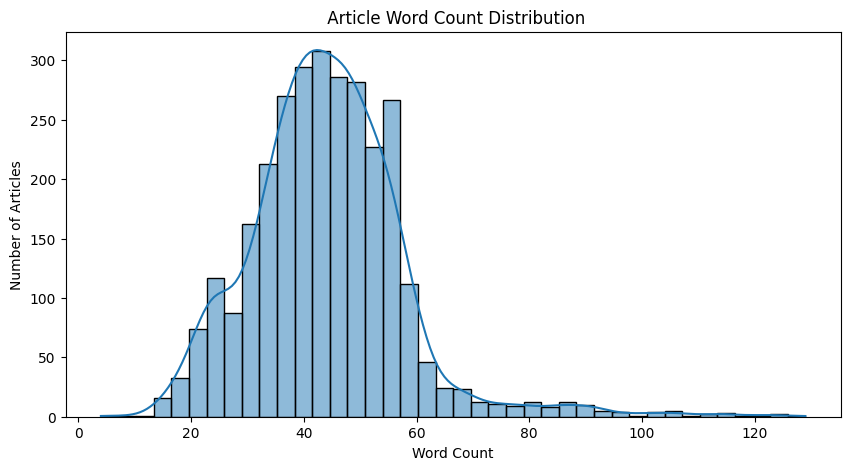

In [ ]:
df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=40, kde=True)
plt.title("Article Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Number of Articles")
plt.show()

3. Top N Frequent Words (excluding stopwords)

/tmp/ipython-input-28-1416029166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


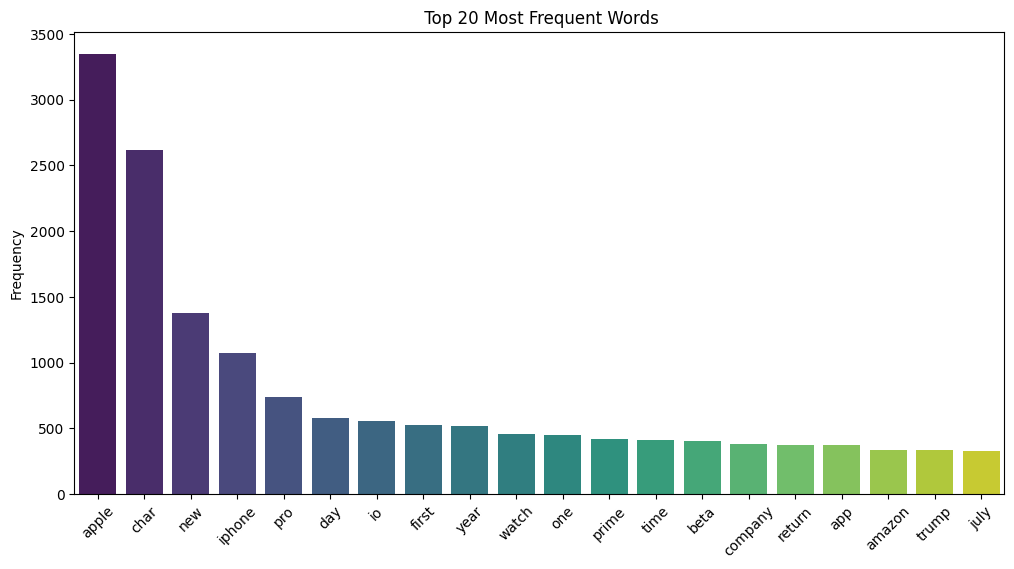

In [ ]:
words = word_tokenize(all_words)
word_freq = Counter(words)

# Top 20
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title(" Top 20 Most Frequent Words")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

4. News Volume Over Time

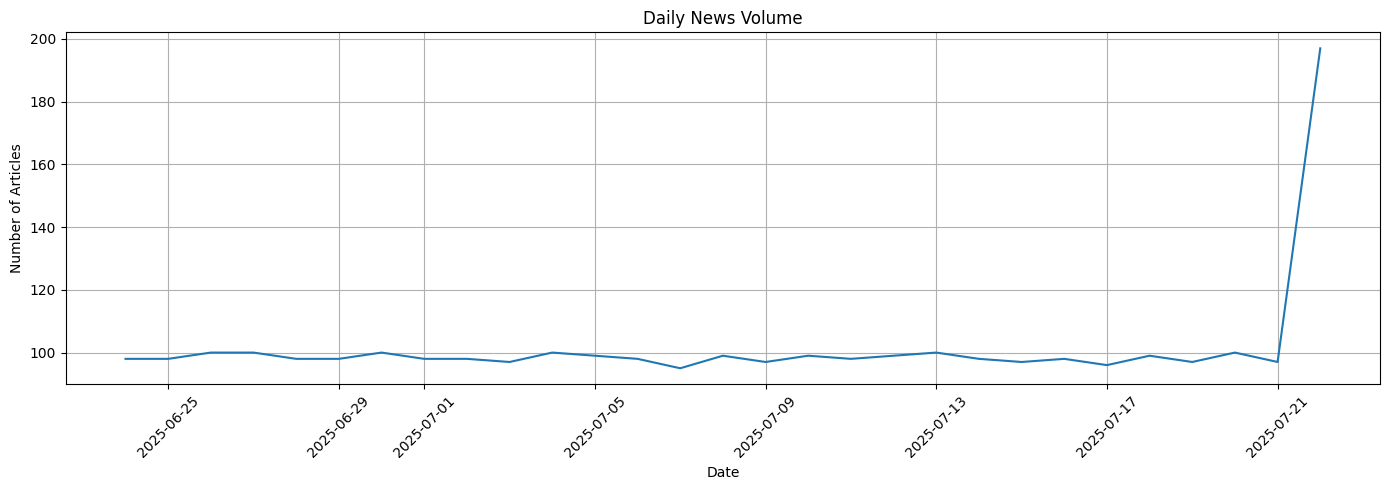

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date_only'] = df['date'].dt.date
daily_counts = df['date_only'].value_counts().sort_index()

plt.figure(figsize=(14, 5))
daily_counts.plot()
plt.title("Daily News Volume")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
duplicate_count = df.duplicated(subset=["headline", "cleaned_text"]).sum()
print(f"Duplicate articles (headline + text): {duplicate_count}")

Duplicate articles (headline + text): 14


<Axes: title={'center': 'Top Sources on 2025-07-21'}, xlabel='source'>

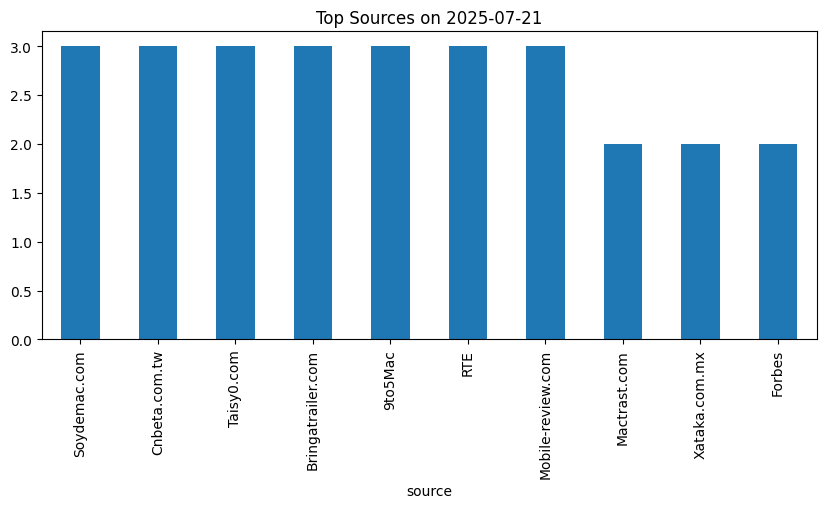

In [ ]:
peak_day = pd.to_datetime("2025-07-21").date()
df_peak = df[df['date'].dt.date == peak_day]
source_counts = df_peak['source'].value_counts().head(10)

source_counts.plot(kind='bar', title="Top Sources on 2025-07-21", figsize=(10, 4))


5. Weekly Heatmap (Articles by Day of Week & Hour)

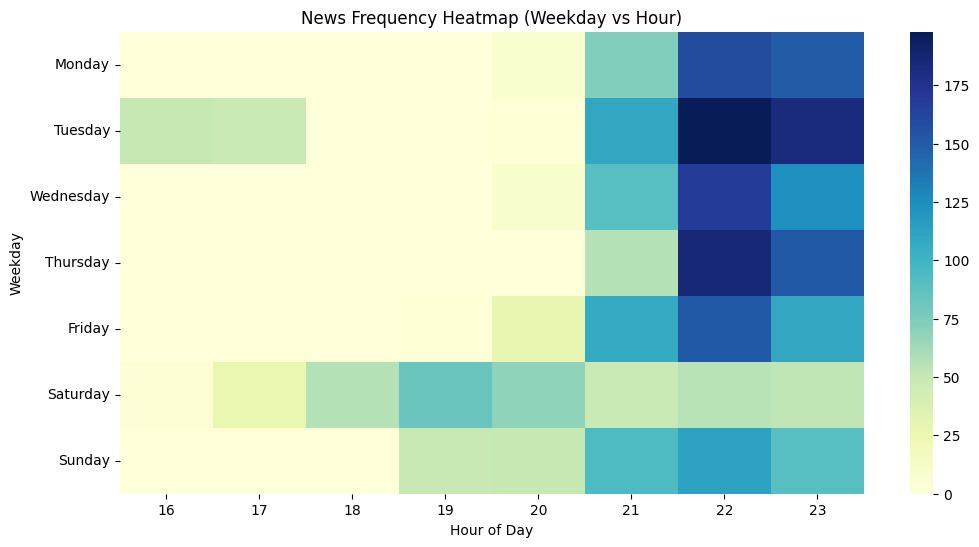

In [ ]:
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.day_name()

heatmap_data = df.groupby(['weekday', 'hour']).size().unstack().fillna(0)

# Reorder weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("News Frequency Heatmap (Weekday vs Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")
plt.show()


In [ ]:
# Convert to US/Eastern (market time zone)
df['date_local'] = df['date'].dt.tz_convert('US/Eastern')
df['hour_local'] = df['date_local'].dt.hour
df['weekday_local'] = df['date_local'].dt.day_name()


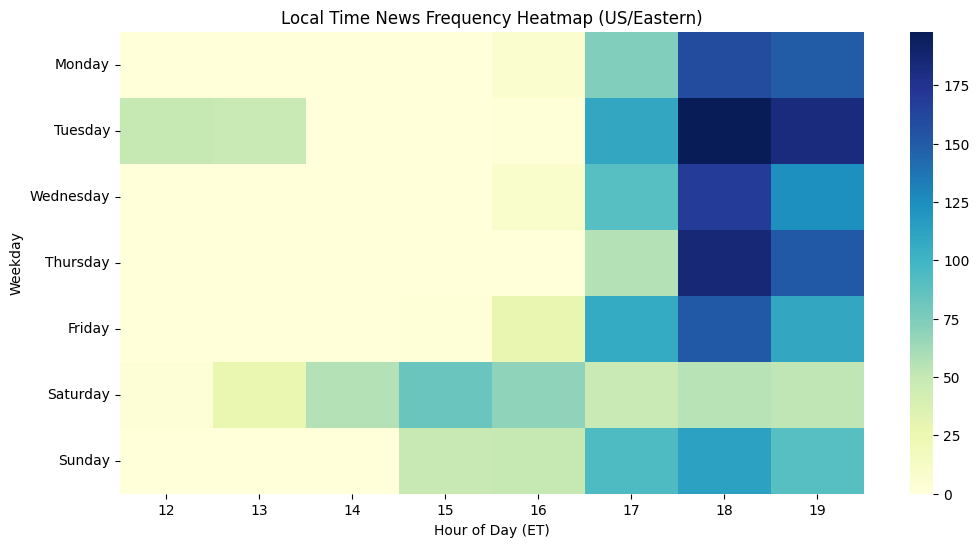

In [ ]:
heatmap_data = df.groupby(['weekday_local', 'hour_local']).size().unstack().fillna(0)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Local Time News Frequency Heatmap (US/Eastern)")
plt.xlabel("Hour of Day (ET)")
plt.ylabel("Weekday")
plt.show()


6. Named Entity Recognition (NER) for Financial Keywords

/tmp/ipython-input-35-4057642320.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(entities), y=list(counts), palette='coolwarm')


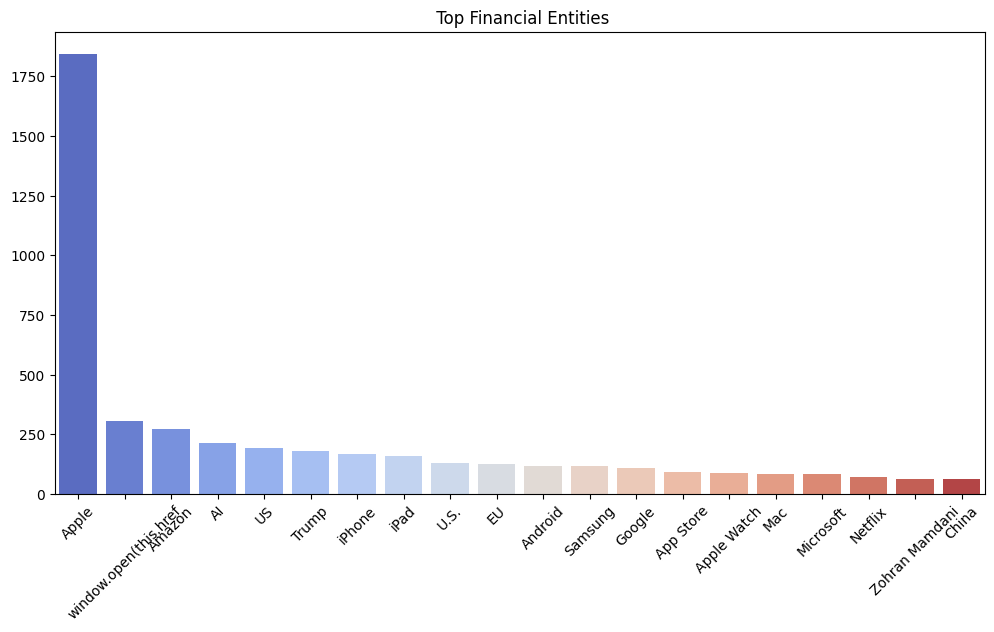

In [ ]:
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ in ['ORG', 'GPE', 'PERSON']]

df['entities'] = df['translated_text'].apply(lambda x: extract_entities(x))

# Flatten and count
all_entities = sum(df['entities'], [])
top_entities = Counter(all_entities).most_common(20)

# Plot
entities, counts = zip(*top_entities)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(entities), y=list(counts), palette='coolwarm')
plt.title("Top Financial Entities")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='sentiment', ylabel='count'>

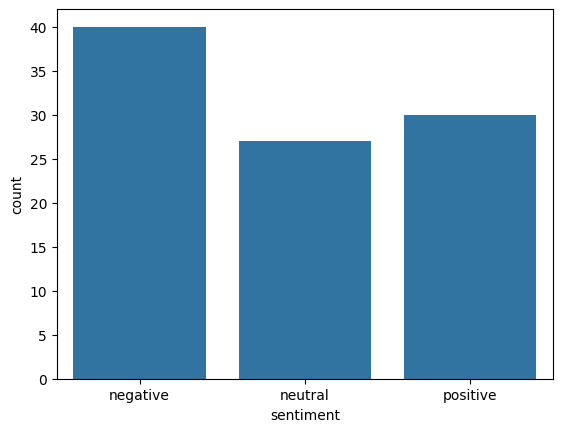

In [ ]:
# Add a dummy 'sentiment' column for now
# Replace this with your actual sentiment analysis code
df['sentiment'] = np.random.choice(['positive', 'negative', 'neutral'], size=len(df))
sns.countplot(data=df[df['date'].dt.date == pd.to_datetime('2025-07-21').date()], x='sentiment')

**final data cleaning for nltk part**

In [ ]:
df.head(2)

,date,headline,summary,url,source,content,text,lang_detected,translated_text,cleaned_text,word_count,date_only,hour,weekday,entities,date_local,hour_local,weekday_local,sentiment
0,2025-06-24 23:59:58+00:00,Node v22.17.0 (LTS),"Node.js® is a free, open-source, cross-platfor...",https://nodejs.org/en/blog/release/v22.17.0,Nodejs.org,Antoine du Hamel\r\nConstructing classes like ...,"Node v22.17.0 (LTS). Node.js® is a free, open-...",en,"Node v22.17.0 (LTS). Node.js® is a free, open-...",node lts nodejs free opensource crossplatform ...,38,2025-06-24,23,Tuesday,"[Node v22.17.0, LTS, Node.js®, Antoine du Hame...",2025-06-24 19:59:58-04:00,19,Tuesday,positive
1,2025-06-24 23:57:16+00:00,"Marcelo vê Moçambique a ""olhar para o futuro""",Presidente da República está em Moçambique par...,https://observador.pt/2025/06/25/marcelo-ve-mo...,Observador.pt,O Presidente da República Portuguesa disse est...,"Marcelo vê Moçambique a ""olhar para o futuro""....",pt,"Marcelo sees Mozambique to ""look at the future...",marcelo see mozambique look futurepresident re...,36,2025-06-24,23,Tuesday,"[Marcelo, Mozambique, Mozambique, Independence...",2025-06-24 19:57:16-04:00,19,Tuesday,positive


In [ ]:
# Select relevant columns
final_df = df[[
    'date_local',
    'headline',
    'cleaned_text',
    'word_count',
    'weekday_local'
]].copy()

# Rename for consistency
final_df.rename(columns={
    'date_local': 'date',
    'weekday_local': 'weekday'
}, inplace=True)

# Convert date to datetime without timezone for easy merging later
final_df['date'] = pd.to_datetime(final_df['date']).dt.tz_localize(None)

# Drop duplicates based on 'headline' + 'cleaned_text'
before = len(final_df)
final_df.drop_duplicates(subset=['headline', 'cleaned_text'], inplace=True)
after = len(final_df)

print(f"Dropped {before - after} duplicate rows.")

# Check sample
print("Final cleaned dataset preview:")
display(final_df.head())

Dropped 14 duplicate rows.
Final cleaned dataset preview:


,date,headline,cleaned_text,word_count,weekday
0,2025-06-24 19:59:58,Node v22.17.0 (LTS),node lts nodejs free opensource crossplatform ...,38,Tuesday
1,2025-06-24 19:57:16,"Marcelo vê Moçambique a ""olhar para o futuro""",marcelo see mozambique look futurepresident re...,36,Tuesday
2,2025-06-24 19:56:34,Obediências maçónicas emitem declaração em def...,masonic obedience issue statement defense peac...,38,Tuesday
3,2025-06-24 19:54:57,8点1氪｜顺丰等多家快递公司拒收罗马仕充电宝；字节通报大模型团队负责人出轨HRBP处理结果；...,express express delivery company refused accep...,124,Tuesday
4,2025-06-24 19:54:56,Almada. Detido suspeito de tentativa de homicí...,almadadetained suspected attempted murder braz...,36,Tuesday


**save**

In [ ]:
# Save to pipeline-friendly location
output_path = "/content/drive/MyDrive/Colab Notebooks/Finance Projects/Sentiment-Analysis-on-Financial-News-and-Its-Impact-on-Stock-Prices/data/apple_news_cleaned.csv"
final_df.to_csv(output_path, index=False)
print(f"Final cleaned news saved to: {output_path}")

Final cleaned news saved to: /content/drive/MyDrive/Colab Notebooks/Finance Projects/Sentiment-Analysis-on-Financial-News-and-Its-Impact-on-Stock-Prices/data/apple_news_cleaned.csv
